# Homework 02

## Step 1. Follow along with the tutorial to gain an understanding of the process

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

```
Label	Class
0	zero
1	one
2	two
3	three
4	four
5	five
6	six
7	seven
8	eight
9	nine
```

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [2]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9704059/9704059 [00:00<00:00, 105512252.58it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 18525306.11it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 147023447.64it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 21247601.69it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


## Iterating and Visualizing the Dataset

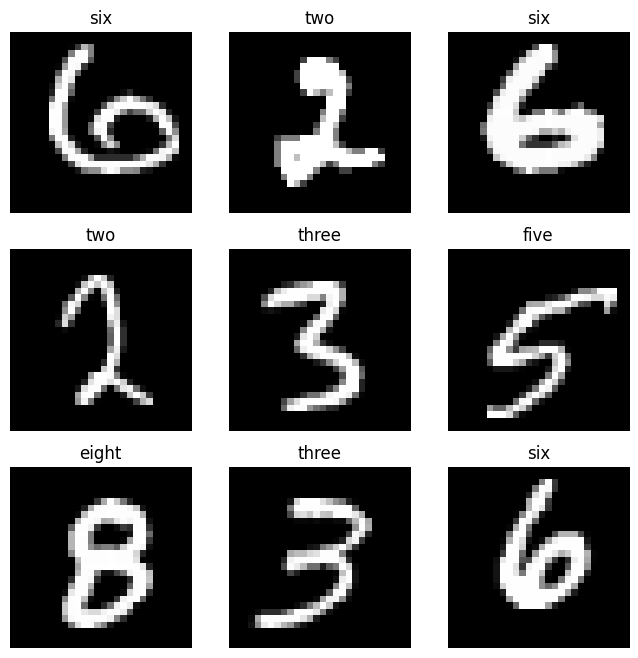

In [3]:
labels_map = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

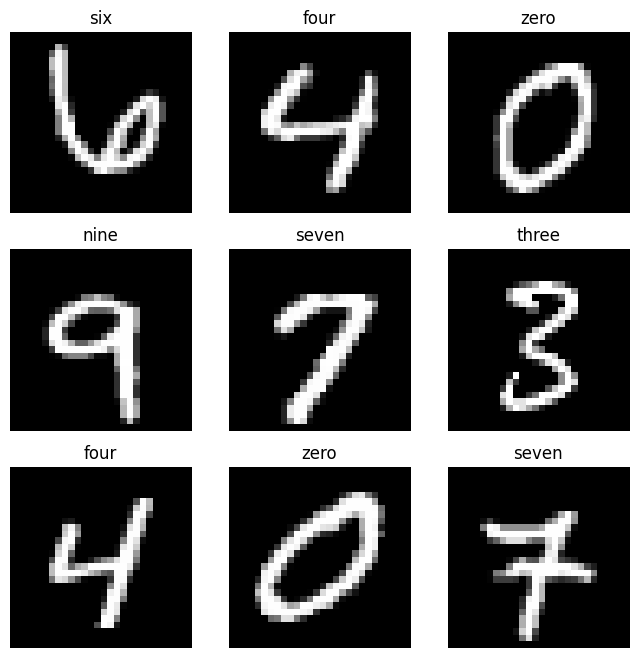

In [4]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.039912818968296
Epoch 1, Batch 200, Loss: 0.4314788065850735
Epoch 1, Batch 300, Loss: 0.3985300162434578
Epoch 1, Batch 400, Loss: 0.3486643570661545
Epoch 1, Batch 500, Loss: 0.32799233809113504
Epoch 1, Batch 600, Loss: 0.31175397425889967
Epoch 1, Batch 700, Loss: 0.29149720422923564
Epoch 1, Batch 800, Loss: 0.27009903248399497
Epoch 1, Batch 900, Loss: 0.26305700331926346
Epoch 2, Batch 100, Loss: 0.23679918624460697
Epoch 2, Batch 200, Loss: 0.22231985241174698
Epoch 2, Batch 300, Loss: 0.2126964517682791
Epoch 2, Batch 400, Loss: 0.20952611457556486
Epoch 2, Batch 500, Loss: 0.19973242547363043
Epoch 2, Batch 600, Loss: 0.172581967972219
Epoch 2, Batch 700, Loss: 0.1951978100463748
Epoch 2, Batch 800, Loss: 0.16808914493769408
Epoch 2, Batch 900, Loss: 0.1770450621843338
Epoch 3, Batch 100, Loss: 0.16110652178525925
Epoch 3, Batch 200, Loss: 0.14720284461975097
Epoch 3, Batch 300, Loss: 0.14281261682510377
Epoch 3, Batch 400, Loss: 0.1433027979359030

In [7]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total}')

Accuracy on train set: 0.97165


In [8]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Accuracy on test set: 0.962


High Accuracy is observed in both training and test sets. This could mean that the model is generalizing well. However, there is a chance that the test data and train data is very similar which is why the model is able to predict the labels correctly in most of the cases



### Predicted vs Actual Labels

In [9]:
import random
import torch

# Set the model to evaluation mode
model.eval()


stored_images = []
stored_labels = []
stored_predictions = []

# Disable gradient calculation
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)


        _, predicted = torch.max(outputs.data, 1)

        # Store the images, labels, and predictions
        stored_images.extend(images.numpy())
        stored_labels.extend(labels.numpy())
        stored_predictions.extend(predicted.numpy())


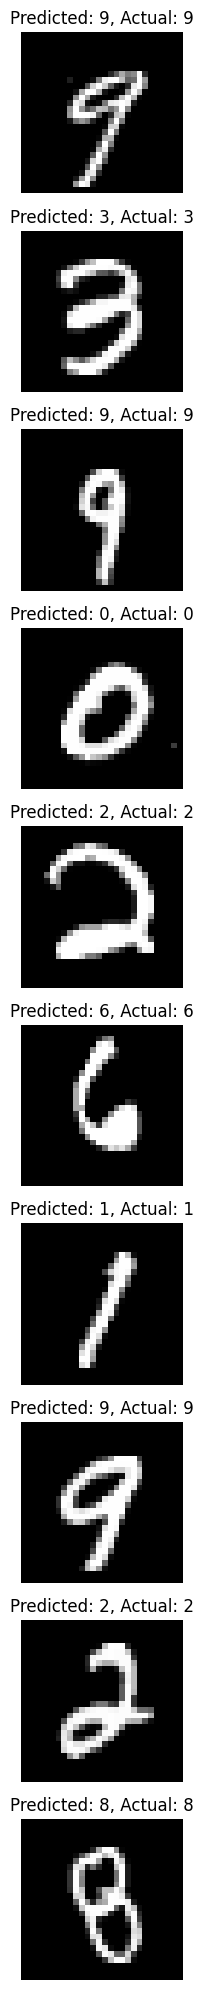

In [10]:
import matplotlib.pyplot as plt

def show_random_predictions(num_images=5):
    # Choose random indices to select images
    indices = random.sample(range(len(stored_images)), num_images)

    # Create a figure to display the images
    plt.figure(figsize=(10, 2 * num_images))

    for i, idx in enumerate(indices):
        image = stored_images[idx].reshape(28, 28)  # Reshape the image to 28x28
        true_label = stored_labels[idx]
        predicted_label = stored_predictions[idx]

        plt.subplot(num_images, 1, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Predicted: {predicted_label}, Actual: {true_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display random images with their predictions
show_random_predictions(num_images=10)


## Step 4. Choose one of the proposed modifications below:

**Increase the current number of nodes in the layer to 256**

**Hypothesis for Increasing the Number of Neurons in the First Layer from 128 to 256**


Increased Learning Capacity:
By increasing the number of neurons in the first layer from 128 to 256, the model will have a higher capacity to learn more complex patterns in the data. This could potentially lead to improved performance on the training set as the model can represent more intricate relationships within the data.

Potential Improvement in Generalization:
If the data is complex and requires a richer feature representation, the additional neurons may help the model generalize better to unseen data by capturing more relevant features. This may result in a slight improvement in test accuracy if the model was underfitting with fewer neurons.

Higher Risk of Overfitting:
Increasing the number of neurons will increase the number of parameters in the model, which could lead to overfitting, especially if the training dataset is not large or diverse enough. The model might start memorizing the training data rather than learning to generalize well to new data. This could be observed by a widening gap between training and test accuracies or an increase in test loss.

Slower Convergence and Increased Training Time:
The model with more neurons will have more parameters to learn, which could result in slower convergence during training. More epochs or a smaller learning rate might be required to achieve the same level of performance, potentially leading to longer training times.


Null Hypothesis:
Increasing the number of neurons in the first hidden layer from 128 to 256 will have no significant effect on the model's performance or generalization ability. The test accuracy and loss will remain approximately the same as with the original configuration.

Alternate Hypothesis:
Increasing the number of neurons in the first hidden layer from 128 to 256 will result in one or more of the following changes:








In [11]:
import torch
import torch.nn as nn


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Changed from 128 to 256 neurons
        self.fc2 = nn.Linear(256, 64)       # Updated to match the new number of neurons
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()


In [12]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.8637669688463211
Epoch 1, Batch 200, Loss: 0.41648651391267777
Epoch 1, Batch 300, Loss: 0.3782477630674839
Epoch 1, Batch 400, Loss: 0.3267154850810766
Epoch 1, Batch 500, Loss: 0.30799195818603037
Epoch 1, Batch 600, Loss: 0.2906809610873461
Epoch 1, Batch 700, Loss: 0.22318613827228545
Epoch 1, Batch 800, Loss: 0.21673894867300988
Epoch 1, Batch 900, Loss: 0.22008985020220279
Epoch 2, Batch 100, Loss: 0.1909509651735425
Epoch 2, Batch 200, Loss: 0.16701428666710855
Epoch 2, Batch 300, Loss: 0.16952516067773105
Epoch 2, Batch 400, Loss: 0.166242791749537
Epoch 2, Batch 500, Loss: 0.15466214329004288
Epoch 2, Batch 600, Loss: 0.15013063207268715
Epoch 2, Batch 700, Loss: 0.15419566877186297
Epoch 2, Batch 800, Loss: 0.1646386256814003
Epoch 2, Batch 900, Loss: 0.135932602789253
Epoch 3, Batch 100, Loss: 0.13233736649155617
Epoch 3, Batch 200, Loss: 0.11621674568392336
Epoch 3, Batch 300, Loss: 0.1323221999593079
Epoch 3, Batch 400, Loss: 0.12568179505877197

In [13]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total}')

Accuracy on train set: 0.9817833333333333%


In [14]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Accuracy on test set: 0.9708%


**Results of Hypothesis:**

Increased Learning Capacity:
The increase in the number of neurons did not significantly affect the model's learning capacity in terms of test accuracy. The model's ability to learn and represent patterns in the training data might have increased due to the added neurons, but this did not translate into improved performance on the test set. This suggests that the original configuration (128 neurons) was already sufficient to capture the necessary patterns in the data.

Potential Improvement in Generalization: There was no observed improvement in generalization, as indicated by the unchanged test accuracy. The additional neurons did not help the model generalize better to the test data. This could mean that the model with 128 neurons already had an adequate capacity to generalize well and that adding more neurons did not provide any further benefit.

Higher Risk of Overfitting:
There was no significant evidence of increased overfitting as the test accuracy remained the same. If overfitting had occurred, we would typically observe a significant gap between training accuracy and test accuracy, with the test accuracy being lower. Since test accuracy did not change, it suggests that the additional neurons did not cause the model to overfit the training data.

Slower Convergence and Increased Training Time:
While the test accuracy remained the same, increasing the number of neurons could still have caused slower convergence and longer training times due to the increased number of parameters. However, since the test accuracy did not change, this suggests that any increase in training time did not result in a corresponding improvement in model performance.

Results of Hypothesis Test:
Null Hypothesis: Increasing the number of neurons in the first hidden layer from 128 to 256 will have no significant effect on the model's performance or generalization ability.

Outcome: The null hypothesis is supported. The test accuracy did not significantly changed, indicating no significant change in performance or generalization ability.


## Checking for Overfitting

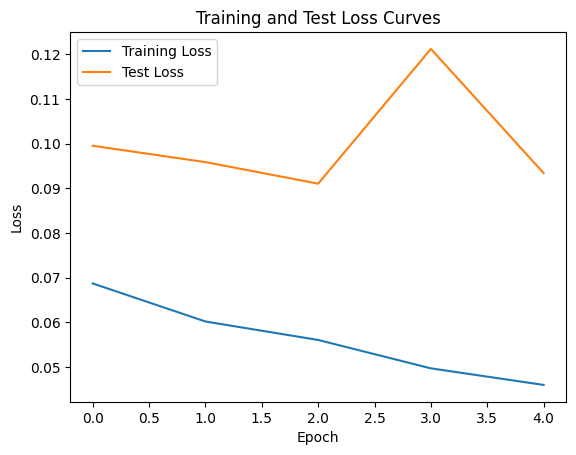

In [15]:

import matplotlib.pyplot as plt

# Define lists to store loss values
train_losses = []
test_losses = []

# Training and Evaluation Loop
num_epochs = 5
for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluation
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(test_loader))


# Plotting the loss curves
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss Curves')
plt.show()


The above graph indicates possibility of the model overfitting the data

##Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

## 1. Experimenting with different optimizers

### SGD Optimizer

In [17]:
import torch
import torch.nn as nn

# Define the neural network architecture with updated number of neurons
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.2663949316740035
Epoch 1, Batch 200, Loss: 0.46542293041944505
Epoch 1, Batch 300, Loss: 0.3766078120470047
Epoch 1, Batch 400, Loss: 0.31938236869871617
Epoch 1, Batch 500, Loss: 0.32092810943722727
Epoch 1, Batch 600, Loss: 0.2957056416198611
Epoch 1, Batch 700, Loss: 0.2646942812949419
Epoch 1, Batch 800, Loss: 0.24249208182096482
Epoch 1, Batch 900, Loss: 0.2489932819455862
Epoch 2, Batch 100, Loss: 0.2149851955473423
Epoch 2, Batch 200, Loss: 0.1997242857515812
Epoch 2, Batch 300, Loss: 0.1896139716729522
Epoch 2, Batch 400, Loss: 0.19643987331539392
Epoch 2, Batch 500, Loss: 0.18845027625560762
Epoch 2, Batch 600, Loss: 0.15381353992968796
Epoch 2, Batch 700, Loss: 0.16753083225339652
Epoch 2, Batch 800, Loss: 0.15124513873830436
Epoch 2, Batch 900, Loss: 0.16411773193627596
Epoch 3, Batch 100, Loss: 0.13096432477235795
Epoch 3, Batch 200, Loss: 0.12061006089672446
Epoch 3, Batch 300, Loss: 0.12874610882252455
Epoch 3, Batch 400, Loss: 0.13794462572783

As observed SGD is giving similar results as Adam Optimizer

### RMSProp

In [20]:
import torch
import torch.nn as nn

# Define the neural network architecture with updated number of neurons
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Changed from 128 to 256 neurons
        self.fc2 = nn.Linear(128, 64)       # Updated to match the new number of neurons
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()


# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.02737556964159
Epoch 1, Batch 200, Loss: 0.4741986207664013
Epoch 1, Batch 300, Loss: 0.4036251616477966
Epoch 1, Batch 400, Loss: 0.37062671184539797
Epoch 1, Batch 500, Loss: 0.3237224851548672
Epoch 1, Batch 600, Loss: 0.29349912613630297
Epoch 1, Batch 700, Loss: 0.2787782746553421
Epoch 1, Batch 800, Loss: 0.25368869088590146
Epoch 1, Batch 900, Loss: 0.2505707685649395
Epoch 2, Batch 100, Loss: 0.24103565469384194
Epoch 2, Batch 200, Loss: 0.19571945257484913
Epoch 2, Batch 300, Loss: 0.20034818533807994
Epoch 2, Batch 400, Loss: 0.20422308433800937
Epoch 2, Batch 500, Loss: 0.18447681937366725
Epoch 2, Batch 600, Loss: 0.18554109964519738
Epoch 2, Batch 700, Loss: 0.17958620980381965
Epoch 2, Batch 800, Loss: 0.16247320733964443
Epoch 2, Batch 900, Loss: 0.15774462804198264
Epoch 3, Batch 100, Loss: 0.15358144361525775
Epoch 3, Batch 200, Loss: 0.13279574109241365
Epoch 3, Batch 300, Loss: 0.15080777233466505
Epoch 3, Batch 400, Loss: 0.15350363550707

Since the test accuracy differences between the three optimizers are minimal, RMSProp give the best result

## 2. Different Loss Function

### NLLLoss with RMS Optimizer

In [24]:
import torch
import torch.nn as nn

# Define the neural network architecture with updated number of neurons
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Changed from 128 to 256 neurons
        self.fc2 = nn.Linear(128, 64)       # Updated to match the new number of neurons
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.log_softmax(x, dim=1)

# Initialize the neural network
model = MLP()


# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.0072036138176919
Epoch 1, Batch 200, Loss: 0.4498357209563255
Epoch 1, Batch 300, Loss: 0.36483227357268333
Epoch 1, Batch 400, Loss: 0.3159330451488495
Epoch 1, Batch 500, Loss: 0.292697311937809
Epoch 1, Batch 600, Loss: 0.28126874685287473
Epoch 1, Batch 700, Loss: 0.2692325457930565
Epoch 1, Batch 800, Loss: 0.23458165101706982
Epoch 1, Batch 900, Loss: 0.24223659437149764
Epoch 2, Batch 100, Loss: 0.20465156521648167
Epoch 2, Batch 200, Loss: 0.18506706960499286
Epoch 2, Batch 300, Loss: 0.2029736078903079
Epoch 2, Batch 400, Loss: 0.16979090869426727
Epoch 2, Batch 500, Loss: 0.1756021811068058
Epoch 2, Batch 600, Loss: 0.1774773783609271
Epoch 2, Batch 700, Loss: 0.17362386088818313
Epoch 2, Batch 800, Loss: 0.1507663419470191
Epoch 2, Batch 900, Loss: 0.15370356112718583
Epoch 3, Batch 100, Loss: 0.1383543248102069
Epoch 3, Batch 200, Loss: 0.15402960665058343
Epoch 3, Batch 300, Loss: 0.14159073427319527
Epoch 3, Batch 400, Loss: 0.1404014165326953


### NLLLoss with Adam Optimizer

In [23]:
import torch
import torch.nn as nn

# Define the neural network architecture with updated number of neurons
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Changed from 128 to 256 neurons
        self.fc2 = nn.Linear(128, 64)       # Updated to match the new number of neurons
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.log_softmax(x, dim=1)

# Initialize the neural network
model = MLP()


# Define the loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.0519101271033287
Epoch 1, Batch 200, Loss: 0.45283372193574906
Epoch 1, Batch 300, Loss: 0.35246051236987114
Epoch 1, Batch 400, Loss: 0.3664228904247284
Epoch 1, Batch 500, Loss: 0.30768319383263587
Epoch 1, Batch 600, Loss: 0.3025664329528809
Epoch 1, Batch 700, Loss: 0.2817090856283903
Epoch 1, Batch 800, Loss: 0.25462089642882346
Epoch 1, Batch 900, Loss: 0.25709312841296195
Epoch 2, Batch 100, Loss: 0.21035999789834023
Epoch 2, Batch 200, Loss: 0.19490796361118556
Epoch 2, Batch 300, Loss: 0.2104581209272146
Epoch 2, Batch 400, Loss: 0.1934430769830942
Epoch 2, Batch 500, Loss: 0.18642303831875323
Epoch 2, Batch 600, Loss: 0.17370095621794462
Epoch 2, Batch 700, Loss: 0.157994322180748
Epoch 2, Batch 800, Loss: 0.16871990468353032
Epoch 2, Batch 900, Loss: 0.18204358376562596
Epoch 3, Batch 100, Loss: 0.14279728565365077
Epoch 3, Batch 200, Loss: 0.15987961035221815
Epoch 3, Batch 300, Loss: 0.14944653287529946
Epoch 3, Batch 400, Loss: 0.13130557240918

The model performs slightly better with the Adam optimizer (96.73% accuracy) compared to RMSprop (96.54% accuracy) when using NLLLoss, suggesting that Adam's adaptive learning rate may be more effective for this task.

## 3. Adding Dropout Layers

In [26]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.5)  # 50% Dropout after the first layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # 50% Dropout after the second layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after the first layer
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after the second layer
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()



# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.7102178347110748
Epoch 1, Batch 200, Loss: 1.007952932715416
Epoch 1, Batch 300, Loss: 0.7640428423881531
Epoch 1, Batch 400, Loss: 0.6995948776602745
Epoch 1, Batch 500, Loss: 0.6201365250349045
Epoch 1, Batch 600, Loss: 0.6069484025239944
Epoch 1, Batch 700, Loss: 0.584265248477459
Epoch 1, Batch 800, Loss: 0.5556141811609269
Epoch 1, Batch 900, Loss: 0.5487004169821739
Epoch 2, Batch 100, Loss: 0.5388127228617668
Epoch 2, Batch 200, Loss: 0.501519932448864
Epoch 2, Batch 300, Loss: 0.5060207936167717
Epoch 2, Batch 400, Loss: 0.5020092368125916
Epoch 2, Batch 500, Loss: 0.4810940377414227
Epoch 2, Batch 600, Loss: 0.4648394148051739
Epoch 2, Batch 700, Loss: 0.46294610008597376
Epoch 2, Batch 800, Loss: 0.4750521358847618
Epoch 2, Batch 900, Loss: 0.46281621426343916
Epoch 3, Batch 100, Loss: 0.4639094650745392
Epoch 3, Batch 200, Loss: 0.4456281998753548
Epoch 3, Batch 300, Loss: 0.43509199351072314
Epoch 3, Batch 400, Loss: 0.4306303994357586
Epoch 3, B

The accuracy drop after adding dropout is likely due to too much regularization (high dropout rate) or the model requiring more time to adapt to the dropout's impact.

In [29]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.3)  # 50% Dropout after the first layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.3)  # 50% Dropout after the second layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after the first layer
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after the second layer
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()



# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.3410533702373504
Epoch 1, Batch 200, Loss: 0.6756048628687858
Epoch 1, Batch 300, Loss: 0.5462661269307136
Epoch 1, Batch 400, Loss: 0.49923954099416734
Epoch 1, Batch 500, Loss: 0.44561885073781016
Epoch 1, Batch 600, Loss: 0.4136417417228222
Epoch 1, Batch 700, Loss: 0.3850753016769886
Epoch 1, Batch 800, Loss: 0.3541193294525147
Epoch 1, Batch 900, Loss: 0.35866860128939154
Epoch 2, Batch 100, Loss: 0.3453838312625885
Epoch 2, Batch 200, Loss: 0.3375104331970215
Epoch 2, Batch 300, Loss: 0.3318309915065765
Epoch 2, Batch 400, Loss: 0.3105008882284164
Epoch 2, Batch 500, Loss: 0.30500393435359
Epoch 2, Batch 600, Loss: 0.28989491701126097
Epoch 2, Batch 700, Loss: 0.2755699717998505
Epoch 2, Batch 800, Loss: 0.3010988166928291
Epoch 2, Batch 900, Loss: 0.2764510227739811
Epoch 3, Batch 100, Loss: 0.2681877402961254
Epoch 3, Batch 200, Loss: 0.2566530752182007
Epoch 3, Batch 300, Loss: 0.26108471244573594
Epoch 3, Batch 400, Loss: 0.26358256563544274
Epoch 

### Leaky Relu Activation Function

In [30]:
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.3)  # 50% Dropout after the first layer
        self.fc2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.3)  # 50% Dropout after the second layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.01)  # Apply Leaky ReLU with a negative slope of 0.01
        x = self.dropout1(x)  # Apply dropout after the first layer
        x = F.leaky_relu(self.fc2(x), negative_slope=0.01)  # Apply Leaky ReLU with a negative slope of 0.01
        x = self.dropout2(x)  # Apply dropout after the second layer
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()



# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')

Epoch 1, Batch 100, Loss: 1.2157650351524354
Epoch 1, Batch 200, Loss: 0.6208386504650116
Epoch 1, Batch 300, Loss: 0.5401927003264427
Epoch 1, Batch 400, Loss: 0.4797400715947151
Epoch 1, Batch 500, Loss: 0.44636751487851145
Epoch 1, Batch 600, Loss: 0.4436462412774563
Epoch 1, Batch 700, Loss: 0.45231898337602616
Epoch 1, Batch 800, Loss: 0.4292633493244648
Epoch 1, Batch 900, Loss: 0.42081716760993004
Epoch 2, Batch 100, Loss: 0.41417746752500534
Epoch 2, Batch 200, Loss: 0.3789195428788662
Epoch 2, Batch 300, Loss: 0.3986369444429874
Epoch 2, Batch 400, Loss: 0.39017951592803
Epoch 2, Batch 500, Loss: 0.3842410919070244
Epoch 2, Batch 600, Loss: 0.37588257968425753
Epoch 2, Batch 700, Loss: 0.3782647348940372
Epoch 2, Batch 800, Loss: 0.3806031005084515
Epoch 2, Batch 900, Loss: 0.36548017248511316
Epoch 3, Batch 100, Loss: 0.37443740651011465
Epoch 3, Batch 200, Loss: 0.3674711473286152
Epoch 3, Batch 300, Loss: 0.3494153770804405
Epoch 3, Batch 400, Loss: 0.37233939692378043
Epoc

### ELU Activation Function

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(0.5)  # 50% Dropout after the first layer
        self.fc2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(0.5)  # 50% Dropout after the second layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        # Apply ELU activation function
        x = F.elu(self.fc1(x), alpha=1.0)  # alpha is the ELU parameter; default is 1.0
        x = self.dropout1(x)  # Apply dropout after the first layer
        x = F.elu(self.fc2(x), alpha=1.0)  # Apply ELU again with alpha=1.0
        x = self.dropout2(x)  # Apply dropout after the second layer
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()



# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization
# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}')


Epoch 1, Batch 100, Loss: 1.1445147824287414
Epoch 1, Batch 200, Loss: 0.6529223796725273
Epoch 1, Batch 300, Loss: 0.5899612015485763
Epoch 1, Batch 400, Loss: 0.5340283113718033
Epoch 1, Batch 500, Loss: 0.5366106387972832
Epoch 1, Batch 600, Loss: 0.5372053039073944
Epoch 1, Batch 700, Loss: 0.48952288314700126
Epoch 1, Batch 800, Loss: 0.49102840304374695
Epoch 1, Batch 900, Loss: 0.49364613473415375
Epoch 2, Batch 100, Loss: 0.4546696476638317
Epoch 2, Batch 200, Loss: 0.48803925022482875
Epoch 2, Batch 300, Loss: 0.4492187391221523
Epoch 2, Batch 400, Loss: 0.47791764527559283
Epoch 2, Batch 500, Loss: 0.4889053076505661
Epoch 2, Batch 600, Loss: 0.4777873355150223
Epoch 2, Batch 700, Loss: 0.45948525503277776
Epoch 2, Batch 800, Loss: 0.45389839068055154
Epoch 2, Batch 900, Loss: 0.4721662750840187
Epoch 3, Batch 100, Loss: 0.43178520888090133
Epoch 3, Batch 200, Loss: 0.44664207950234414
Epoch 3, Batch 300, Loss: 0.4599326401948929
Epoch 3, Batch 400, Loss: 0.46762172877788544


ReLU Outperforms Both ELU and Leaky ReLU:

The model achieves the highest accuracy with the ReLU activation function (93.56%). This suggests that ReLU is the most effective activation function for  current model and dataset among the three tested.

Leaky ReLU Performs Better Than ELU:

Leaky ReLU achieves a higher accuracy (92.13%) compared to ELU (90.12%). This indicates that allowing a small gradient for negative inputs (as in Leaky ReLU) is more effective for the model than the exponential approach of ELU.

ELU Shows Lower Accuracy:

The ELU activation function results in the lowest test accuracy (90.12%). This suggests that, for this specific dataset and model architecture, ELU may not be as effective as ReLU or Leaky ReLU. ELU's characteristic of allowing outputs to be negative may not be benefiting the model in this case.